In [74]:
import torch
from nsvd import NSVD4, plot_img
from norwai_regression import NSVDModel, Haversine, ConvModule
from torchvision import transforms
import random
import folium
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


In [75]:
tf = transforms.Compose([
  #transforms.CenterCrop((512, 512)),
  transforms.RandomResizedCrop((256, 256), (0.7, 1)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
])
tf1 = transforms.Compose([
  #transforms.CenterCrop((512, 512)),
  transforms.Resize((256, 256)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
])

norm_tf = transforms.Compose([
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

#img = Image.open('./data/test_images/1r1qO8UPGY.png').convert('RGB')
#img = tf(img)

#train_data = NSVD4('./data', False, "coords", False, transforms=tf)

test = NSVD4('./data', False, 'coords', False, transforms=tf)
test1 = NSVD4('./data', False, 'coords', False, transforms=tf1)

tensor([61.8162, 10.8497], device='cuda:0')


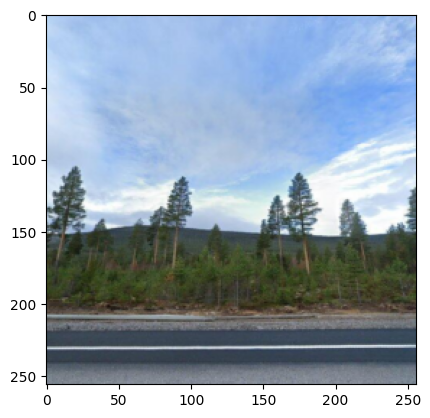

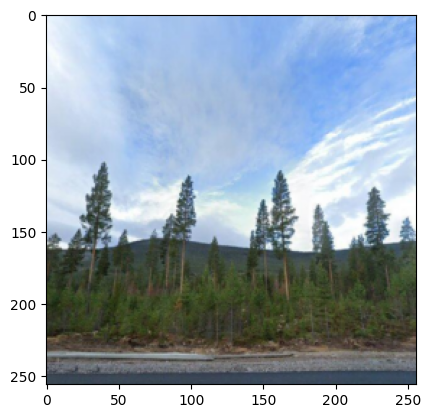

In [76]:
idx = random.randint(0, len(test)-1)
img, coords, _ = test[idx]
img1, coords1, _ = test[idx]
#print(img)
img, coords = img.to(device), torch.tensor(coords).to(device).float()
#coords = torch.tensor([59.6196286,8.8742238]).to(device).float()
print(coords)
#img = img.to(device)
plot_img(img.cpu())
plot_img(img1)
img = norm_tf(img)


In [77]:

#model = NSVDModel()
model = torch.load('./data/trained_models/distance/resnet152_256_30_0.0001_128_exp098')
model.to(device)
model.eval()


with torch.no_grad():
  guess = model(img.unsqueeze(0)).flatten()
  print(guess)

print(coords)
print(guess)


tensor([61.8306, 10.7367], device='cuda:0')
tensor([61.8162, 10.8497], device='cuda:0')
tensor([61.8306, 10.7367], device='cuda:0')


In [78]:
loss_fn = Haversine()
def weed(a,b):
  a = a.unsqueeze(0)
  b = b.unsqueeze(0)
  print(a.shape, b.shape)
  print("distance: {}".format(loss_fn(a[:, 0], a[:, 1], b[:, 0], b[:, 1])))

weed(guess, coords)

torch.Size([1, 2]) torch.Size([1, 2])
distance: 6.141757011413574


In [79]:
m = folium.Map((64.9701, 13.509217), zoom_start=4)
folium.CircleMarker(location=(coords[0], coords[1]), tooltip='real', radius=1, color='#0080bb', fill_color='#0080bb').add_to(m)
folium.CircleMarker(location=(guess[0], guess[1]), tooltip='guessed', radius=1, color='#d40834', fill_color='#d40834').add_to(m)
folium.PolyLine([(coords[0], coords[1]),(guess[0], guess[1])], color='red').add_to(m)

m
